## Data/Loading/ functions

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [25]:
#Load data
labels = np.load('Simulations\labels_test.npy')
dataset =  np.load('Simulations\y_test.npy')

#embeded dataset
pkl_filename = "embedded_dataset.txt"
#Load from file
with open(pkl_filename, 'rb') as file:
    x_embedded = pickle.load(file) 

range_ = np.arange(1,101,1) #useful for plotting

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


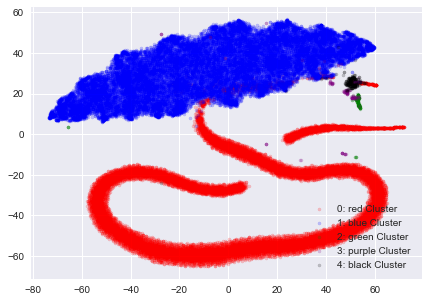

In [3]:
def groups(array,lowest_class):
    groups = []
    counter = lowest_class
    while True:
        cluster = (array == counter).sum()
        if cluster != 0:
            groups.append(cluster)
            counter += 1
        else:
            break;
        
    return groups

# plot an example from a class as given by a model

def plot_(array,cluster_number,point): #takes model predictions,class to plot from, whether to plot the
                                        #first,second or third example
    index = 0
    number = 0
    while index != len(array):
        if array[index] == cluster_number:
            plt.scatter(range_,dataset[index])
            plt.show()
            number +=1
        if number ==point:
            break;
        index +=1
    return 

#Shade Predictions according to model

def shade(embedded_dataset,predictions,numof_class,name):
    colours = ['red','blue','green','purple','black','yellow','orange','cyan','magenta']
    #First we split the dataset according predicted classes
    classes = []
    for j in range(numof_class):
        print("Isolating Class ")
        Class =[]
        for i in range(len(predictions)):
            if  predictions[i] ==j:
                Class.append(embedded_dataset[i])
        classes.append(Class)
    
    #Plotting the classses
        #Initialize plot
    plt.style.use("seaborn")
    plt.figure(figsize=(7,5))
    #plt.figure(facecolor="g")
    
    legend = []
    samples = []
    print("Plotting")
    for i in range(numof_class):
        classes[i] = np.array(classes[i])
        plt.scatter(classes[i][:,0],classes[i][:,1],s = 10,c = colours[i],alpha = 0.2)
        legend.append(str(i) +": " +colours[i] + " Cluster ")
        
    plt.legend(legend, 
               loc='lower right')
    plt.savefig(name+"shade.png")
    
    return
shade(x_embedded,labels,5,"labels")
    

In [ ]:

colours = ['red','blue','green','purple','black','yellow','orange']
for i in range(5):
    for j in range(len(labels)):
        if labels[j+9] ==4:
            plt.scatter(range_,dataset[j+9],c = colours[4])
            plt.show()
            break;
        
    

## K-Means Clustering

In [4]:
#Initialize model
km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            verbose=0, 
            random_state=None, 
            copy_x=True,
            algorithm='auto')

In [34]:
#Cluster and save

km = km.fit_predict(dataset)
pkl_filename = "KMean2.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(km,file)


Isolating Class 
Isolating Class 
Plotting


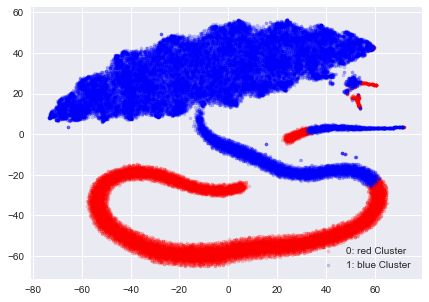

In [15]:
#Load and evaluate

pkl_filename = "KMean2.plk"

with open(pkl_filename, 'rb') as file:
    km = pickle.load(file)

shade(x_embedded,km,2,"KMeans")

In [13]:
groups(km,0)
plot_(km,0,3)
plot_(km,1,3)
plot_(km,2,3)

In [15]:
print(first,second,third,well_fourth)

## Mean-Shift Clustering

In [16]:
#Libraries
from sklearn.cluster import MeanShift

In [17]:
#Initialize,train save

ms = MeanShift( bandwidth=None,
               seeds=None, #Default seed finding functions scale horribly with dimensions
               bin_seeding=True, #True implies initial windows are not on all points
               min_bin_freq=1,
               cluster_all=False, #Unclustered outcasts points will be labelled -1
               n_jobs=-1,
               max_iter=100,
              )
ms=ms.fit_predict(dataset)
pkl_filename = "Mean_Shift10CA.plk"
save
with open(pkl_filename, 'wb') as file:
    pickle.dump(ms,file)

Isolating Class 
Isolating Class 
Plotting


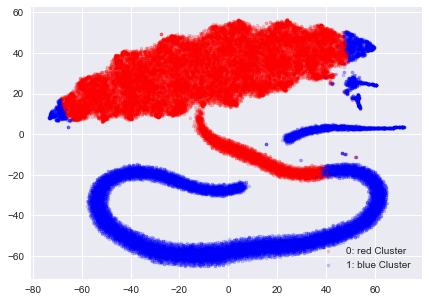

In [5]:
#Load and evaluate

pkl_filename = "Mean_Shift10CA.plk"
with open(pkl_filename, 'rb') as file:
    ms = pickle.load(file)

nms = np.where(ms ==-1,1,ms)
for i in range(len(ms)):
    if ms[i] ==1:
        print(ms[i])
shade(x_embedded,nms,2,"Mean_ShadeCallCA")

## Density Based Spatial Clustering of Applications with Noise

In [26]:
from sklearn.cluster import DBSCAN

In [43]:
dbc =  DBSCAN(eps = 196,
                 min_samples = 200,  #eps and min_samples 
                 metric = 'euclidean',
                 n_jobs = 10)

In [44]:
dbc.fit(dataset[0:10000])

DBSCAN(eps=196, min_samples=200, n_jobs=10)

In [45]:
pkl_filename = "dbscan.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(dbc,file)

In [47]:
pkl_filename = "dbscan.plk"

with open(pkl_filename, 'rb') as file:
    dbc = pickle.load(file)

print(dbc.components_)
print(dbc.core_sample_indices_)
print(dbc.labels_)
print(groups(dbc.labels_,-1))


[[-9.52848898e-03 -1.31344900e-01 -3.04782260e-02 ...  1.01178475e+00
   6.98978748e-01  9.32884640e-01]
 [ 4.13784104e-01  2.28336174e-01  2.61529372e-01 ...  1.36586819e+00
   1.45466896e+00  1.45930807e+00]
 [-6.56382588e-03  4.76414597e-02 -1.37682035e-01 ...  9.30577049e-01
   1.09706200e+00  1.15483901e+00]
 ...
 [ 1.61390541e-02 -4.27023128e-04  1.23374017e-01 ... -9.13543399e-01
  -9.14526409e-01 -8.25730564e-01]
 [ 1.57725806e-01  1.03903344e-01  1.28307182e-01 ...  8.00346001e-01
   9.33836871e-01  9.08081489e-01]
 [ 1.48256209e-01  2.96755666e-01  3.92440632e-01 ...  1.83153183e+00
   1.59272023e+00  1.74236586e+00]]
[   0    1    2 ... 9997 9998 9999]
[0 0 0 ... 0 0 0]
[]


0
Isolating Class 
Plotting


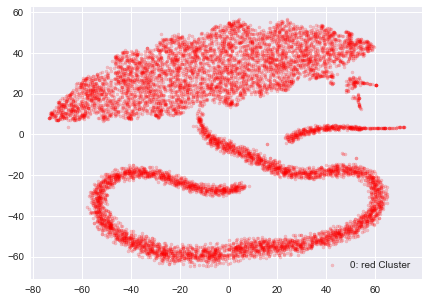

In [49]:
a = dbc.labels_
print(a.max())

a = np.where(a ==-1,a.max()+1,a)
shade(x_embedded[0:10000],a,a.max()+1,"dbc2d")

## Hierachichal Density based clustering

In [16]:
import hdbscan

In [17]:
a = 1000
hd = hdbscan.HDBSCAN(min_cluster_size = 5,
                     min_samples = 625)

In [18]:
hd.fit(dataset[5000:10000])
pkl_filename = "hdbscan_cust3000.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(hd,file)

In [ ]:
plot_(hd.labels_,-1,33)

1
[1081, 1175, 2744]
[-1  1 -1 ...  0 -1  1]
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


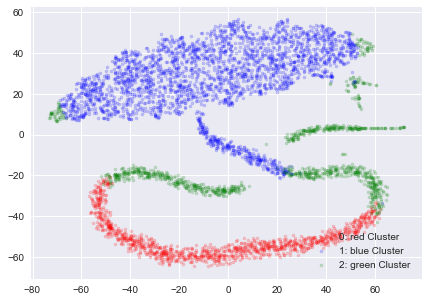

In [20]:
a = np.array(hd.labels_)
print(a.max())
print(groups(a,-1)) #Number of elements per cluster
a = np.where(a==-1,a.max()+1,a)
print(hd.labels_)

shade(x_embedded[5000:10000],a,a.max()+1,"subhdbscan_min_samples4_mincluster100")


## Dimensionality Reduction techniques

In [10]:
from sklearn.manifold import TSNE

In [ ]:
x_embedded = TSNE(n_components = 2,
                  learning_rate = 'auto',
                 init = 'random',
                  verbose = 5,
                  )
x_embedded = x_embedded.fit_transform(dataset)

#Save 2D represenatation

pkl_filename = "embedded_dataset.txt"
#Load from file
with open(pkl_filename, 'wb') as file:
    pickle.dump(x_embedded,file) 
print(x_embedded)
%time

## Playing around

In [159]:
# Dropout Feature extraction
from numpy import random
np.random.randint(100)

def droppout(dataset):
    pickle_name = "datadroppout3.plk"
    new_dataset = []
    
    for i in range(len(dataset)):
        data_point = []                          # reduced array to be appended
        
        for j in range(10):
            
            data_point.append(dataset[i][10*j])

            
        new_dataset.append(data_point)
    with open(pkl_filename, 'wb') as file:
        pickle.dump(new_dataset,file)
        
    return len(dataset[0]),len(new_dataset[0])
    
            

droppout(dataset) 

(100, 10)

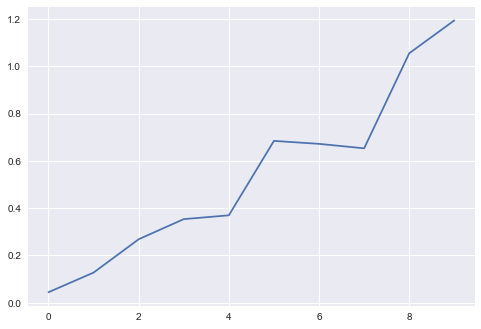

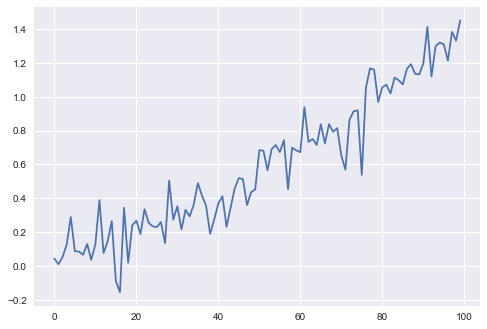

In [163]:
plt.plot(reduced_dataset[4133])
plt.show()
plt.plot(dataset[4133])
plt.show()


In [8]:
pickle_name = "datadroppout3.plk"

with open(pkl_filename, 'rb') as file:
    reduced_dataset = pickle.load(file)
    
hd = hdbscan.HDBSCAN(min_cluster_size = 20,
                     min_samples = 4000)

hd.fit(reduced_dataset)

NameError: name 'hdbscan' is not defined

1
[15221, 10411, 24368]
[ 1 -1  1 ...  1 -1 -1]
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


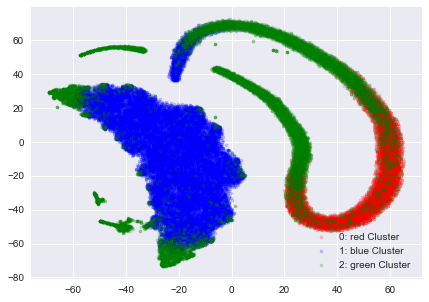

In [164]:
a = np.array(hd.labels_)
print(a.max())
print(groups(a,-1)) #Number of elements per cluster
a = np.where(a==-1,a.max()+1,a)
print(hd.labels_)

shade(x_embedded,a,a.max()+1,"reduced_hdbscan_min_samples4_mincluster100")